# XGBoost

In [1]:
import pandas as pd
import os
import sys
sys.path.insert(0, os.path.abspath("../src"))
from models import (
    xgb_random_search,
    xgb_grid_search,
    model_evaluation 
)
from data_preprocessing import (
    encode_categorical,
)
import warnings
warnings.filterwarnings("ignore")
import pickle
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform
def save_object(obj, filename): 
    with open(filename, 'wb') as output: 
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL) 

### First approach - XGBoost on unchanged data (with missing values)

In [2]:
support2 = fetch_ucirepo(id=880) 
  
X = support2.data.features 
y = support2.data.targets[['death']] 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2020)

In [4]:
X_train, label_encoders= encode_categorical(X_train)
X_test, label_encoders= encode_categorical(X_test)

Random Search

In [5]:
param_distribution = {
    'n_estimators': randint(10, 100), 
    'max_depth': randint(3, 20), 
    'learning_rate': uniform(0.01, 0.3), 
    'subsample': uniform(0.6, 0.4), 
    'colsample_bytree': uniform(0.6, 0.4), 
    'gamma': uniform(0, 5), 
    'reg_alpha': uniform(0, 10), 
    'reg_lambda': uniform(0, 10) 
}

In [6]:
best_random_xgb, best_thresh_random_xgb = xgb_random_search(X_train,y_train,param_distribution)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for XGBoost (Random Search): {'colsample_bytree': 0.6814145334639807, 'gamma': 3.8307067358593856, 'learning_rate': 0.11921385428780523, 'max_depth': 7, 'n_estimators': 73, 'reg_alpha': 2.725432956923366, 'reg_lambda': 8.649810890377697, 'subsample': 0.9667445622105222}
Best ROC-AUC for XGBoost (Random Search): 0.8501998047197729
Optimal threshold (in terms of Youden statistic): 0.647
True Positive Rate: 0.808
False Positive Rate: 0.175


AUC-ROC: 0.8533
Confusion matrix (threshold = 0.647):
TN: 460, FP: 142, FN: 270, TP: 949

Classification report:
              precision    recall  f1-score   support

           0      0.630     0.764     0.691       602
           1      0.870     0.779     0.822      1219

    accuracy                          0.774      1821
   macro avg      0.750     0.771     0.756      1821
weighted avg      0.791     0.774     0.778      1821



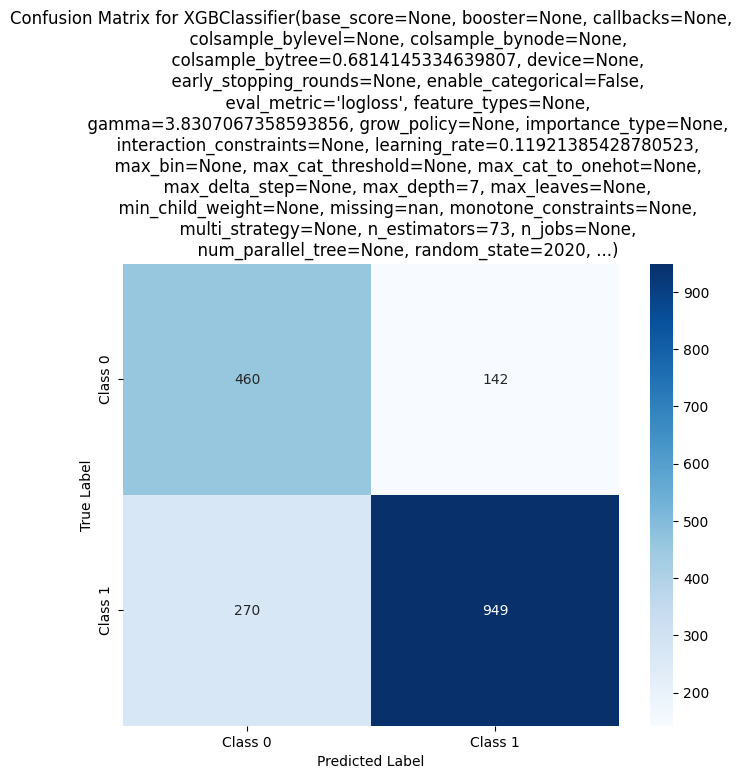

In [7]:
model_evaluation(X_test,y_test,best_random_xgb,best_thresh_random_xgb)

Grid Search

In [8]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [9]:
best_grid_xgb, best_thresh_grid_xgb = xgb_grid_search(X_train,y_train,param_grid)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost (Grid Search): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best ROC-AUC for XGBoost (Grid Search): 0.8513058610886844
Optimal threshold (in terms of Youden statistic): 0.684
True Positive Rate: 0.767
False Positive Rate: 0.102


AUC-ROC: 0.8513
Confusion matrix (threshold = 0.684):
TN: 486, FP: 116, FN: 337, TP: 882

Classification report:
              precision    recall  f1-score   support

           0      0.591     0.807     0.682       602
           1      0.884     0.724     0.796      1219

    accuracy                          0.751      1821
   macro avg      0.737     0.765     0.739      1821
weighted avg      0.787     0.751     0.758      1821



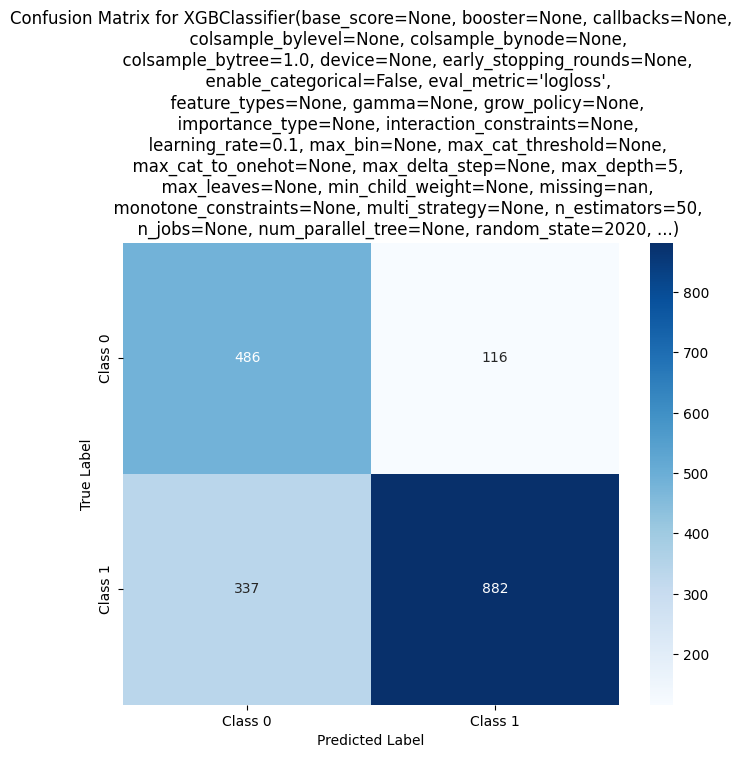

In [10]:
model_evaluation(X_test,y_test,best_grid_xgb,best_thresh_grid_xgb)

### Second Approach - XGBoost on preprocessed data (without using SMOTE)

In [11]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [12]:
X_train_1 = train.drop(columns = ['death'])
y_train_1 = train['death']

X_test_1 = test.drop(columns = ['death'])
y_test_1 = test['death']

Random Search

In [13]:
param_distribution_1 = {
    'n_estimators': randint(10, 100), 
    'max_depth': randint(3, 20), 
    'learning_rate': uniform(0.01, 0.3), 
    'subsample': uniform(0.6, 0.4), 
    'colsample_bytree': uniform(0.6, 0.4), 
    'gamma': uniform(0, 5), 
    'reg_alpha': uniform(0, 10), 
    'reg_lambda': uniform(0, 10) 
}

In [14]:
best_random_xgb_1, best_thresh_random_xgb_1 = xgb_random_search(X_train_1,y_train_1,param_distribution_1)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for XGBoost (Random Search): {'colsample_bytree': 0.8684847897612248, 'gamma': 0.3672810565183654, 'learning_rate': 0.07881898093546062, 'max_depth': 5, 'n_estimators': 77, 'reg_alpha': 6.652841454877752, 'reg_lambda': 6.775803225520519, 'subsample': 0.8638101262716074}
Best ROC-AUC for XGBoost (Random Search): 0.851446580521403
Optimal threshold (in terms of Youden statistic): 0.648
True Positive Rate: 0.787
False Positive Rate: 0.167


AUC-ROC: 0.8518
Confusion matrix (threshold = 0.648):
TN: 428, FP: 149, FN: 267, TP: 963

Classification report:
              precision    recall  f1-score   support

         0.0      0.616     0.742     0.673       577
         1.0      0.866     0.783     0.822      1230

    accuracy                          0.770      1807
   macro avg      0.741     0.762     0.748      1807
weighted avg      0.786     0.770     0.775      1807



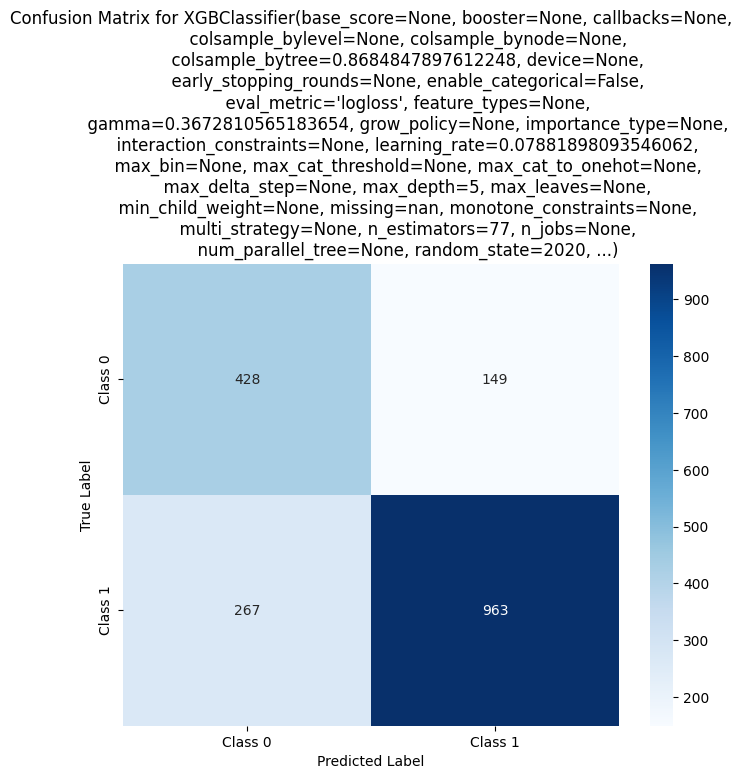

In [15]:
model_evaluation(X_test_1,y_test_1,best_random_xgb_1,best_thresh_random_xgb_1)

Grid Search

In [16]:
param_grid_1 = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [17]:
best_grid_xgb_1, best_thresh_grid_xgb_1 = xgb_grid_search(X_train_1,y_train_1,param_grid_1)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost (Grid Search): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best ROC-AUC for XGBoost (Grid Search): 0.8520458969146858
Optimal threshold (in terms of Youden statistic): 0.620
True Positive Rate: 0.800
False Positive Rate: 0.190


AUC-ROC: 0.8549
Confusion matrix (threshold = 0.620):
TN: 428, FP: 149, FN: 255, TP: 975

Classification report:
              precision    recall  f1-score   support

         0.0      0.627     0.742     0.679       577
         1.0      0.867     0.793     0.828      1230

    accuracy                          0.776      1807
   macro avg      0.747     0.767     0.754      1807
weighted avg      0.791     0.776     0.781      1807



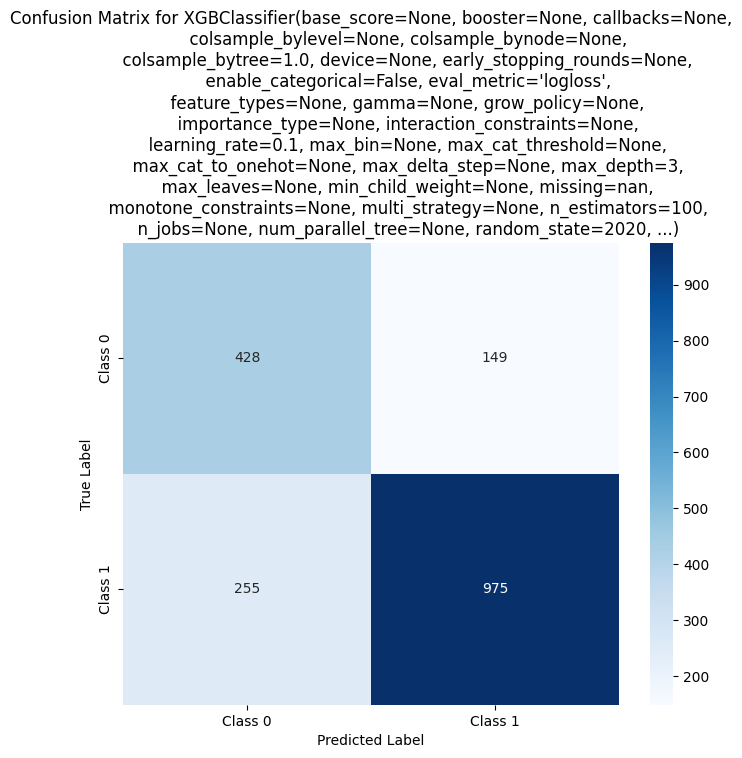

In [18]:
model_evaluation(X_test_1,y_test_1,best_grid_xgb_1,best_thresh_grid_xgb_1)

### Third Approach - XGBoost on preprocessed data with SMOTE

In [19]:
smote = SMOTE(random_state=2020)

In [20]:
X_train_2, y_train_2 = smote.fit_resample(X_train_1, y_train_1)

Random Search

In [21]:
param_distribution_2 = {
    'n_estimators': randint(10, 100), 
    'max_depth': randint(3, 20), 
    'learning_rate': uniform(0.01, 0.3), 
    'subsample': uniform(0.6, 0.4), 
    'colsample_bytree': uniform(0.6, 0.4), 
    'gamma': uniform(0, 5), 
    'reg_alpha': uniform(0, 10), 
    'reg_lambda': uniform(0, 10) 
}

In [22]:
best_random_xgb_2, best_thresh_random_xgb_2 = xgb_random_search(X_train_2,y_train_2,param_distribution_2)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for XGBoost (Random Search): {'colsample_bytree': 0.8822714320680285, 'gamma': 0.1464583172188305, 'learning_rate': 0.12823137873981638, 'max_depth': 19, 'n_estimators': 84, 'reg_alpha': 1.0774866823303975, 'reg_lambda': 1.1111664125365128, 'subsample': 0.9369289720492094}
Best ROC-AUC for XGBoost (Random Search): 0.9263447770040655
Optimal threshold (in terms of Youden statistic): 0.559
True Positive Rate: 1.000
False Positive Rate: 0.000


AUC-ROC: 0.8399
Confusion matrix (threshold = 0.559):
TN: 388, FP: 189, FN: 206, TP: 1024

Classification report:
              precision    recall  f1-score   support

         0.0      0.653     0.672     0.663       577
         1.0      0.844     0.833     0.838      1230

    accuracy                          0.781      1807
   macro avg      0.749     0.752     0.750      1807
weighted avg      0.783     0.781     0.782      1807



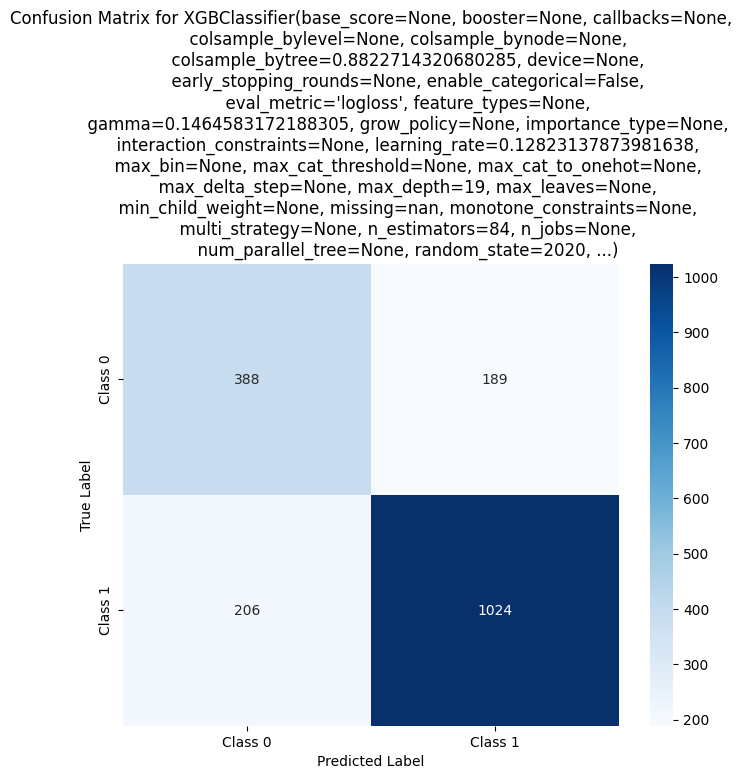

In [23]:
model_evaluation(X_test_1,y_test_1,best_random_xgb_2,best_thresh_random_xgb_2)

Grid Search

In [24]:
param_grid_2 = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [25]:
best_grid_xgb_2, best_thresh_grid_xgb_2 = xgb_grid_search(X_train_2,y_train_2,param_grid_2)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost (Grid Search): {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}
Best ROC-AUC for XGBoost (Grid Search): 0.9292281645313848
Optimal threshold (in terms of Youden statistic): 0.476
True Positive Rate: 0.999
False Positive Rate: 0.001


AUC-ROC: 0.8496
Confusion matrix (threshold = 0.476):
TN: 339, FP: 238, FN: 163, TP: 1067

Classification report:
              precision    recall  f1-score   support

         0.0      0.675     0.588     0.628       577
         1.0      0.818     0.867     0.842      1230

    accuracy                          0.778      1807
   macro avg      0.746     0.728     0.735      1807
weighted avg      0.772     0.778     0.774      1807



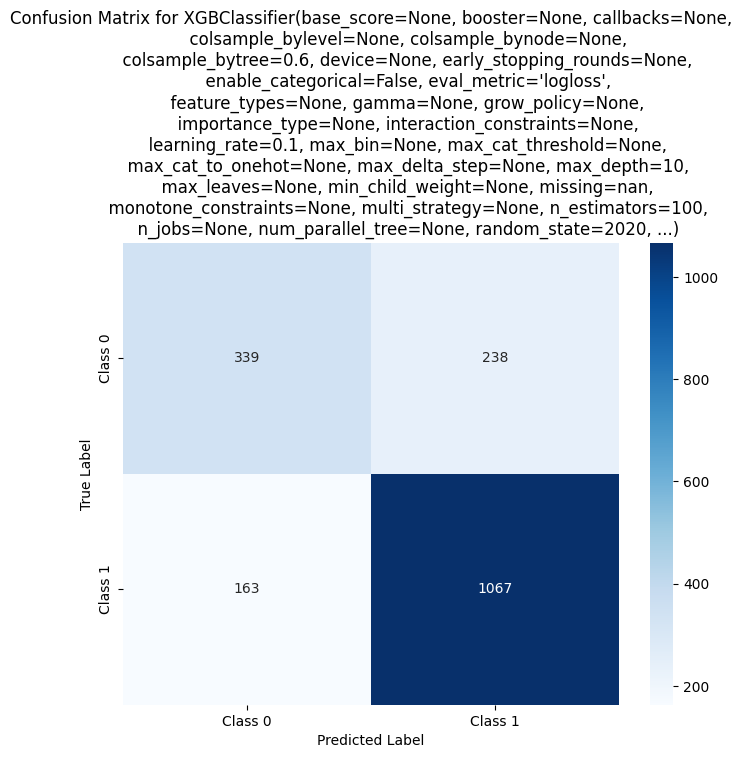

In [26]:
model_evaluation(X_test_1,y_test_1,best_grid_xgb_2,best_thresh_grid_xgb_2)

### AUC-ROC: ###
- Original Data:
    - Random Search: 0.8533
    - Grid Search: 0.8513
- Processed Data:
    - Random Search: 0.8518
    - Grid Search: 0.8549
- Processed Data with SMOTE:
    - Random Search: 0.8399
    - Grid Search: 0.8496


### Saving the best model

In [78]:
with open("../models/xgb_model.pkl", "wb") as f:
    pickle.dump(best_grid_xgb_1, f)